<a href="https://colab.research.google.com/github/ridhodori/data-preprocessing/blob/main/AuditDataClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Load Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hilaler/Audit-data-Risk-using-classification/main/trial.csv")
data.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [ ]:
data.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd23310ff90>,
      dtype=object)

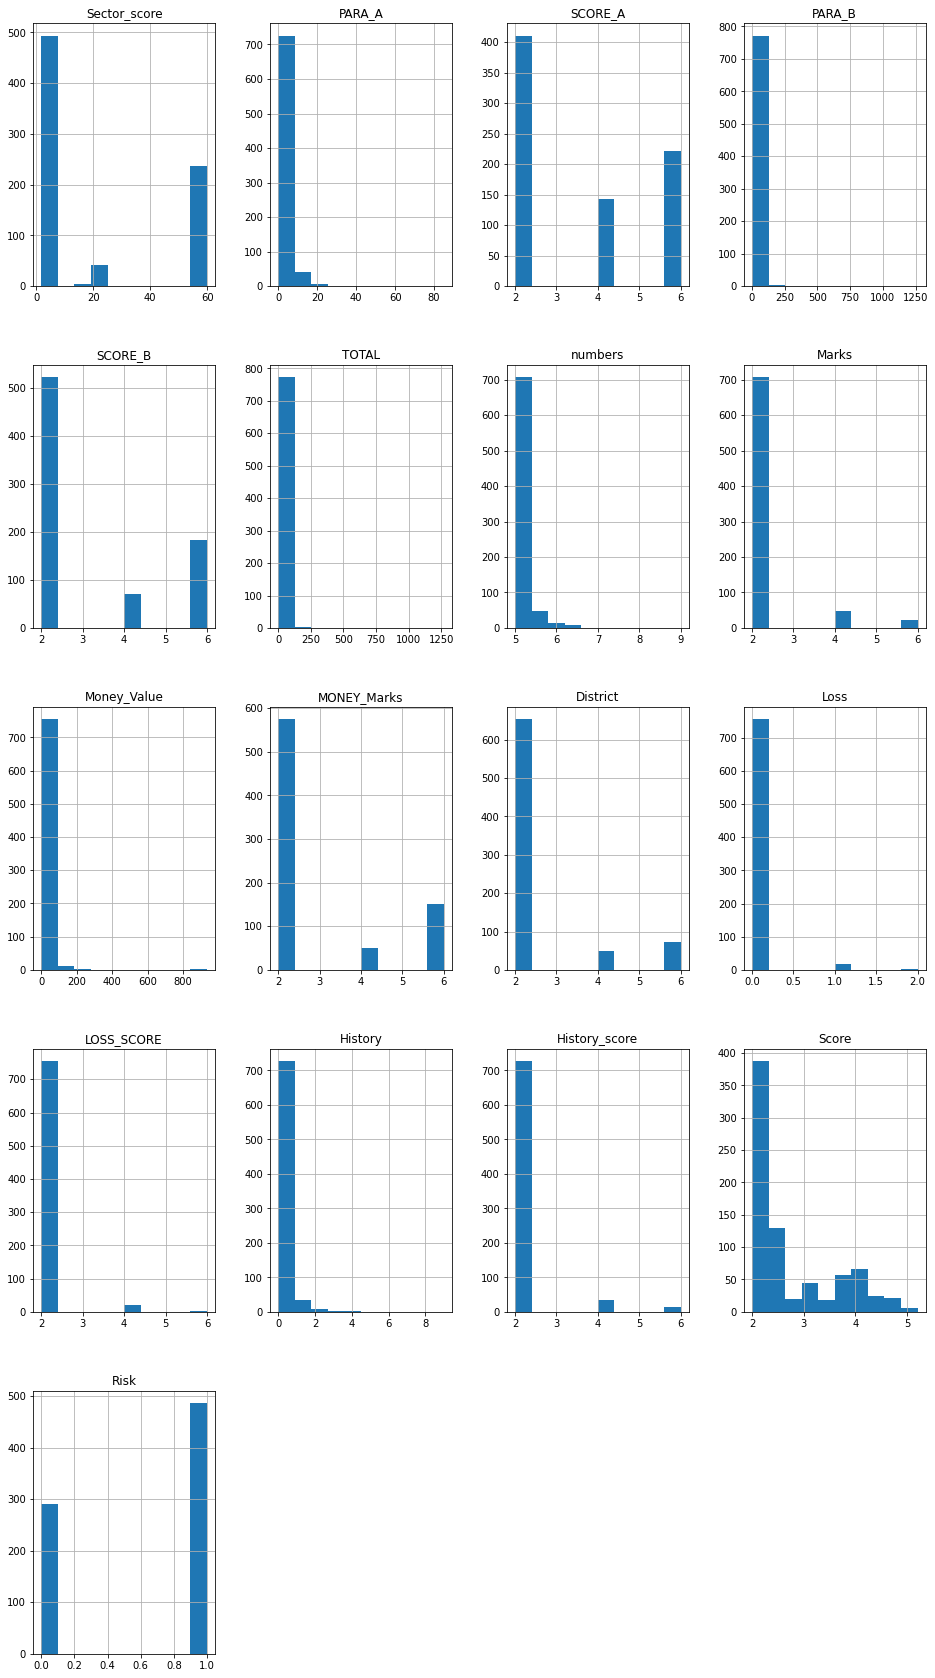

In [ ]:
data.hist(figsize=(16,30))

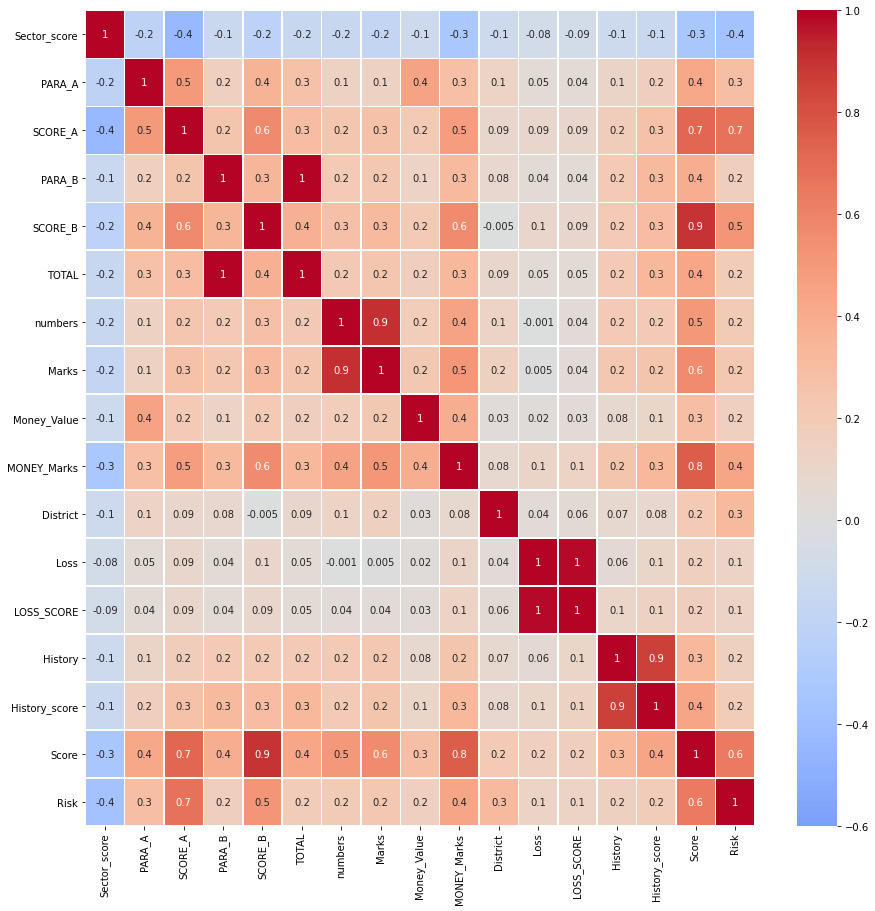

In [ ]:
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_mat, annot=True, ax=ax,
            fmt='.1g', cmap='coolwarm', linewidths=.5,
            vmin=-0.6, vmax=1, center= 0)
plt.show()

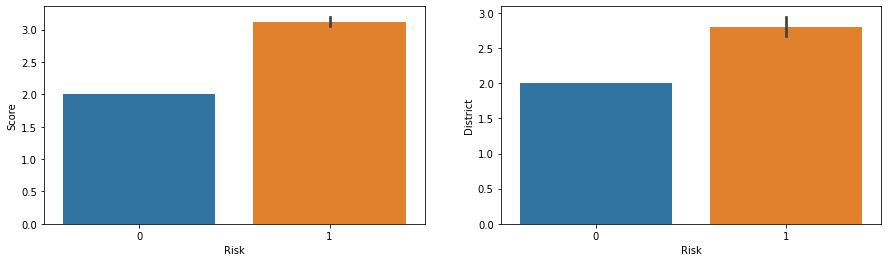

In [ ]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(15,4))

sns.barplot(x='Risk', y='Score', data=data, ax=axis1)
sns.barplot(x='Risk', y='District', data=data, ax=axis2)

In [ ]:
data.drop(['District', 'Sector_score', 'LOCATION_ID', ], axis=1, inplace=True)

In [ ]:
data.isnull().sum()

PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [ ]:
money_median = data['Money_Value'].median()

In [ ]:
data['Money_Value'].fillna(money_median, inplace=True)

In [ ]:
X = data.iloc[:, 0:14].values
X

array([[4.18, 6.  , 2.5 , ..., 0.  , 2.  , 2.4 ],
       [0.  , 2.  , 4.83, ..., 0.  , 2.  , 2.  ],
       [0.51, 2.  , 0.23, ..., 0.  , 2.  , 2.  ],
       ...,
       [0.24, 2.  , 0.04, ..., 0.  , 2.  , 2.  ],
       [0.2 , 2.  , 0.  , ..., 0.  , 2.  , 2.  ],
       [0.  , 2.  , 0.  , ..., 0.  , 2.  , 2.  ]])

In [ ]:
y = data.iloc[:, 14].values
y

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

# Train test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [ ]:
print("score on train: " + str(clf.score(X_train,y_train)))
print("score on test: " + str(clf.score(X_test,y_test)))

score on train: 1.0
score on test: 1.0


# Confusion matrix and accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
precision = accuracy_score(y_test, predict)
print(f'precision: {precision}')

precision: 1.0


In [ ]:
matrix = confusion_matrix(y_test, predict)
print(f'matrix: {matrix}')

matrix: [[ 82   0]
 [  0 112]]


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(clf, X, y, cv = 10)

In [ ]:
print(f' Cross Validation Mean: {result.mean()}')
print(f' Cross Validation Std: {result.std()}')

 Cross Validation Mean: 1.0
 Cross Validation Std: 0.0


# Export model

In [ ]:
import pickle

pickle.dump(clf, open('classifier_model_dt', 'wb'))
load_model = pickle.load(open('classifier_model_dt', 'rb'))

# Load and Predict

In [ ]:
new_data = [1, 3, 2, 4, 6, 6, 7, 8, 6, 5, 4, 2, 2, 3]
new_data = np.asarray(new_data).reshape(1, -1)
new_data

array([[1, 3, 2, 4, 6, 6, 7, 8, 6, 5, 4, 2, 2, 3]])

In [ ]:
result_data= load_model.predict(new_data)
result_data

array([1])

In [ ]:
result_data[0]

1